In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import copy

ruta = "weatherAUS.csv"
df = pd.read_csv(ruta)

In [ ]:
cabecera=['Fecha','Ubicacion','Temp. Min','Temp. Max','Caida de agua(mm)','Evaporacion','Brillo Solar','Dir. del viento(Mas fuerte)','Rapidez del viento(Mas fuerte)','Dir. del viento(9am)','Dir. del viento(3pm)','Rapidez del viento(9am)','Rapidez del viento(3pm)','Humedad(9am)','Humedad(3pm)','Presion(9am)','Presion(3pm)','Nubosidad(9am)','Nubosidad(3pm)','Temperatura(9am)','Temperatura(3pm)','Lluvia hoy','Lluvia mañana']
df.columns = cabecera
df

,Fecha,Ubicacion,Temp. Min,Temp. Max,Caida de agua(mm),Evaporacion,Brillo Solar,Dir. del viento(Mas fuerte),Rapidez del viento(Mas fuerte),Dir. del viento(9am),...,Humedad(9am),Humedad(3pm),Presion(9am),Presion(3pm),Nubosidad(9am),Nubosidad(3pm),Temperatura(9am),Temperatura(3pm),Lluvia hoy,Lluvia mañana
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


#Datos Iniciales

In [ ]:
df.dtypes

Fecha                              object
Ubicacion                          object
Temp. Min                         float64
Temp. Max                         float64
Caida de agua(mm)                 float64
Evaporacion                       float64
Brillo Solar                      float64
Dir. del viento(Mas fuerte)        object
Rapidez del viento(Mas fuerte)    float64
Dir. del viento(9am)               object
Dir. del viento(3pm)               object
Rapidez del viento(9am)           float64
Rapidez del viento(3pm)           float64
Humedad(9am)                      float64
Humedad(3pm)                      float64
Presion(9am)                      float64
Presion(3pm)                      float64
Nubosidad(9am)                    float64
Nubosidad(3pm)                    float64
Temperatura(9am)                  float64
Temperatura(3pm)                  float64
Lluvia hoy                         object
Lluvia mañana                      object
dtype: object

In [ ]:
df.describe(include="all")

,Fecha,Ubicacion,Temp. Min,Temp. Max,Caida de agua(mm),Evaporacion,Brillo Solar,Dir. del viento(Mas fuerte),Rapidez del viento(Mas fuerte),Dir. del viento(9am),...,Humedad(9am),Humedad(3pm),Presion(9am),Presion(3pm),Nubosidad(9am),Nubosidad(3pm),Temperatura(9am),Temperatura(3pm),Lluvia hoy,Lluvia mañana
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2013-11-12,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


In [ ]:
df['Lluvia hoy'].value_counts()

No     110319
Yes     31880
Name: Lluvia hoy, dtype: int64

In [ ]:
df['Lluvia mañana'].value_counts()

No     110316
Yes     31877
Name: Lluvia mañana, dtype: int64

In [ ]:
df['Ubicacion'].value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


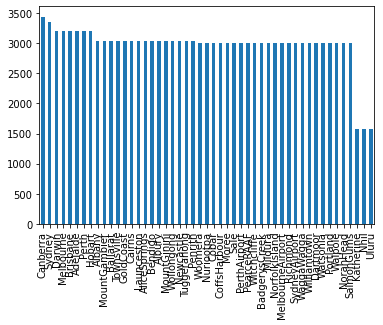

In [ ]:
fig, ax = plt.subplots()
df['Ubicacion'].value_counts().plot(ax=ax, kind="bar")

In [ ]:
columnas = list(df)
for columna in columnas:
    print("Cantidad de datos sin " + columna + ": " + str(len(df) - df[columna].count()))
    print(str(np.round((len(df) - df[columna].count())/float(len(df))*100,2))+"%")
    print("-------")

Cantidad de datos sin Fecha: 0
0.0%
-------
Cantidad de datos sin Ubicacion: 0
0.0%
-------
Cantidad de datos sin Temp. Min: 1485
1.02%
-------
Cantidad de datos sin Temp. Max: 1261
0.87%
-------
Cantidad de datos sin Caida de agua(mm): 3261
2.24%
-------
Cantidad de datos sin Evaporacion: 62790
43.17%
-------
Cantidad de datos sin Brillo Solar: 69835
48.01%
-------
Cantidad de datos sin Dir. del viento(Mas fuerte): 10326
7.1%
-------
Cantidad de datos sin Rapidez del viento(Mas fuerte): 10263
7.06%
-------
Cantidad de datos sin Dir. del viento(9am): 10566
7.26%
-------
Cantidad de datos sin Dir. del viento(3pm): 4228
2.91%
-------
Cantidad de datos sin Rapidez del viento(9am): 1767
1.21%
-------
Cantidad de datos sin Rapidez del viento(3pm): 3062
2.11%
-------
Cantidad de datos sin Humedad(9am): 2654
1.82%
-------
Cantidad de datos sin Humedad(3pm): 4507
3.1%
-------
Cantidad de datos sin Presion(9am): 15065
10.36%
-------
Cantidad de datos sin Presion(3pm): 15028
10.33%
-------
Canti

#Analisis de localidad de Wagga Wagga

In [ ]:
df_Localidad=df[df['Ubicacion']=='WaggaWagga']

In [ ]:
df_Localidad

,Fecha,Ubicacion,Temp. Min,Temp. Max,Caida de agua(mm),Evaporacion,Brillo Solar,Dir. del viento(Mas fuerte),Rapidez del viento(Mas fuerte),Dir. del viento(9am),...,Humedad(9am),Humedad(3pm),Presion(9am),Presion(3pm),Nubosidad(9am),Nubosidad(3pm),Temperatura(9am),Temperatura(3pm),Lluvia hoy,Lluvia mañana
36529,2009-01-01,WaggaWagga,9.9,28.4,0.0,9.8,13.5,WNW,59.0,NW,...,37.0,24.0,1005.2,1003.5,1.0,1.0,20.8,27.0,No,No
36530,2009-01-02,WaggaWagga,8.9,25.3,0.0,14.8,13.7,WSW,48.0,SW,...,37.0,10.0,1013.9,1012.9,1.0,0.0,14.7,23.2,No,No
36531,2009-01-03,WaggaWagga,11.0,30.7,0.0,9.8,13.7,NE,39.0,ENE,...,43.0,18.0,1017.8,1014.3,0.0,1.0,18.9,28.0,No,No
36532,2009-01-04,WaggaWagga,14.7,35.2,0.0,9.4,12.1,N,39.0,NE,...,46.0,19.0,1014.8,1010.6,1.0,4.0,24.7,33.7,No,No
36533,2009-01-05,WaggaWagga,11.8,36.5,0.0,11.6,13.4,W,43.0,NNE,...,23.0,5.0,1013.1,1009.8,1.0,1.0,23.6,34.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39533,2017-06-21,WaggaWagga,-2.8,15.4,0.0,NaN,NaN,WSW,19.0,NaN,...,NaN,55.0,1028.6,1026.5,5.0,NaN,0.4,14.6,No,No
39534,2017-06-22,WaggaWagga,-1.3,14.6,0.0,NaN,NaN,E,17.0,E,...,84.0,55.0,1028.8,1025.5,NaN,6.0,4.6,13.9,No,No
39535,2017-06-23,WaggaWagga,-1.0,15.0,0.2,NaN,NaN,E,20.0,ESE,...,90.0,54.0,1022.0,1017.0,NaN,NaN,3.2,14.4,No,No
39536,2017-06-24,WaggaWagga,-1.8,14.4,0.2,NaN,NaN,W,28.0,SW,...,NaN,57.0,1019.0,1017.4,7.0,8.0,0.2,12.4,No,No


In [ ]:
df_Localidad.describe(include='all')

,Fecha,Ubicacion,Temp. Min,Temp. Max,Caida de agua(mm),Evaporacion,Brillo Solar,Dir. del viento(Mas fuerte),Rapidez del viento(Mas fuerte),Dir. del viento(9am),...,Humedad(9am),Humedad(3pm),Presion(9am),Presion(3pm),Nubosidad(9am),Nubosidad(3pm),Temperatura(9am),Temperatura(3pm),Lluvia hoy,Lluvia mañana
count,3009,3009,3009.000000,3009.000000,2976.000000,2871.000000,2575.000000,2981,2981.000000,2890,...,3006.000000,3009.000000,3009.000000,3009.000000,2786.000000,2836.000000,3009.000000,3009.000000,2976,2976
unique,3009,1,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2009-01-01,WaggaWagga,NaN,NaN,NaN,NaN,NaN,ENE,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,1,3009,NaN,NaN,NaN,NaN,NaN,435,NaN,761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2440,2440
mean,NaN,NaN,9.617182,23.031871,1.709946,5.178823,8.197864,NaN,36.648105,NaN,...,67.856953,42.586574,1018.510037,1015.859854,3.854989,4.194993,14.925457,21.749950,NaN,NaN
std,NaN,NaN,6.551019,7.917145,5.924927,4.215762,4.002538,NaN,13.726375,NaN,...,18.378444,20.850354,7.105617,6.935302,2.980452,2.615594,6.716241,7.677101,NaN,NaN
min,NaN,NaN,-4.700000,6.300000,0.000000,0.000000,0.000000,NaN,11.000000,NaN,...,9.000000,1.000000,991.500000,984.200000,0.000000,0.000000,0.000000,6.000000,NaN,NaN
25%,NaN,NaN,4.300000,16.200000,0.000000,1.800000,5.400000,NaN,26.000000,NaN,...,54.000000,26.000000,1013.600000,1011.000000,1.000000,1.000000,9.400000,15.300000,NaN,NaN
50%,NaN,NaN,9.200000,22.500000,0.000000,4.000000,9.100000,NaN,35.000000,NaN,...,70.000000,40.000000,1018.400000,1015.700000,3.000000,4.000000,14.600000,21.200000,NaN,NaN
75%,NaN,NaN,14.800000,29.300000,0.200000,8.000000,11.300000,NaN,44.000000,NaN,...,82.000000,55.000000,1023.300000,1020.600000,7.000000,7.000000,20.100000,27.800000,NaN,NaN


In [ ]:
columnas = list(df_Localidad)
for columna in columnas:
    print("Cantidad de datos sin " + columna + ": " + str(len(df_Localidad) - df_Localidad[columna].count()))
    print(str(np.round((len(df_Localidad) - df_Localidad[columna].count())/float(len(df_Localidad))*100,2))+"%")
    print("-------")

Cantidad de datos sin Fecha: 0
0.0%
-------
Cantidad de datos sin Ubicacion: 0
0.0%
-------
Cantidad de datos sin Temp. Min: 0
0.0%
-------
Cantidad de datos sin Temp. Max: 0
0.0%
-------
Cantidad de datos sin Caida de agua(mm): 33
1.1%
-------
Cantidad de datos sin Evaporacion: 138
4.59%
-------
Cantidad de datos sin Brillo Solar: 434
14.42%
-------
Cantidad de datos sin Dir. del viento(Mas fuerte): 28
0.93%
-------
Cantidad de datos sin Rapidez del viento(Mas fuerte): 28
0.93%
-------
Cantidad de datos sin Dir. del viento(9am): 119
3.95%
-------
Cantidad de datos sin Dir. del viento(3pm): 15
0.5%
-------
Cantidad de datos sin Rapidez del viento(9am): 0
0.0%
-------
Cantidad de datos sin Rapidez del viento(3pm): 1
0.03%
-------
Cantidad de datos sin Humedad(9am): 3
0.1%
-------
Cantidad de datos sin Humedad(3pm): 0
0.0%
-------
Cantidad de datos sin Presion(9am): 0
0.0%
-------
Cantidad de datos sin Presion(3pm): 0
0.0%
-------
Cantidad de datos sin Nubosidad(9am): 223
7.41%
-------
C

In [ ]:
df_Localidad['Lluvia hoy'].value_counts()

No     2440
Yes     536
Name: Lluvia hoy, dtype: int64

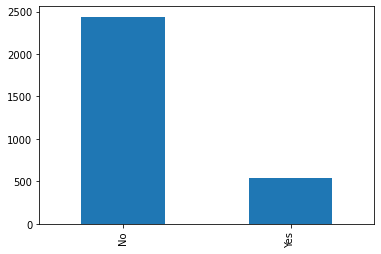

In [ ]:
fig, ax = plt.subplots()
df_Localidad['Lluvia hoy'].value_counts().plot(ax=ax, kind="bar")

In [ ]:
df_Localidad['Lluvia mañana'].value_counts()

No     2440
Yes     536
Name: Lluvia mañana, dtype: int64

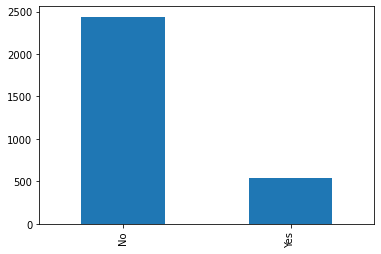

In [ ]:
fig, ax = plt.subplots()
df_Localidad['Lluvia mañana'].value_counts().plot(ax=ax, kind="bar")

##Ahora se eliminan los datos que no tenemos o que no usaremos:

In [ ]:
df2 = copy.copy(df_Localidad)

df2.dropna(subset = ["Evaporacion"], axis = 0, inplace = True)

df2.dropna(subset = ["Brillo Solar"], axis = 0, inplace = True)

df2.dropna(axis = 1, how = 'all', inplace = True)

df2

,Fecha,Ubicacion,Temp. Min,Temp. Max,Caida de agua(mm),Evaporacion,Brillo Solar,Dir. del viento(Mas fuerte),Rapidez del viento(Mas fuerte),Dir. del viento(9am),...,Humedad(9am),Humedad(3pm),Presion(9am),Presion(3pm),Nubosidad(9am),Nubosidad(3pm),Temperatura(9am),Temperatura(3pm),Lluvia hoy,Lluvia mañana
36529,2009-01-01,WaggaWagga,9.9,28.4,0.0,9.8,13.5,WNW,59.0,NW,...,37.0,24.0,1005.2,1003.5,1.0,1.0,20.8,27.0,No,No
36530,2009-01-02,WaggaWagga,8.9,25.3,0.0,14.8,13.7,WSW,48.0,SW,...,37.0,10.0,1013.9,1012.9,1.0,0.0,14.7,23.2,No,No
36531,2009-01-03,WaggaWagga,11.0,30.7,0.0,9.8,13.7,NE,39.0,ENE,...,43.0,18.0,1017.8,1014.3,0.0,1.0,18.9,28.0,No,No
36532,2009-01-04,WaggaWagga,14.7,35.2,0.0,9.4,12.1,N,39.0,NE,...,46.0,19.0,1014.8,1010.6,1.0,4.0,24.7,33.7,No,No
36533,2009-01-05,WaggaWagga,11.8,36.5,0.0,11.6,13.4,W,43.0,NNE,...,23.0,5.0,1013.1,1009.8,1.0,1.0,23.6,34.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39108,2016-04-22,WaggaWagga,14.7,24.2,1.4,2.8,7.9,SW,35.0,S,...,85.0,52.0,1021.7,1018.9,1.0,3.0,17.5,22.0,Yes,No
39109,2016-04-23,WaggaWagga,9.6,23.5,0.0,3.4,10.7,NE,33.0,ESE,...,56.0,24.0,1026.2,1024.2,1.0,1.0,15.7,22.5,No,No
39110,2016-04-24,WaggaWagga,7.5,24.1,0.0,3.6,10.7,ENE,22.0,ESE,...,48.0,25.0,1030.6,1027.6,0.0,1.0,15.0,23.7,No,No
39111,2016-04-25,WaggaWagga,8.0,24.2,0.0,3.8,10.4,ENE,24.0,E,...,63.0,32.0,1032.0,1027.8,0.0,1.0,16.0,23.7,No,No


In [ ]:
df2.describe(include="all")

,Fecha,Ubicacion,Temp. Min,Temp. Max,Caida de agua(mm),Evaporacion,Brillo Solar,Dir. del viento(Mas fuerte),Rapidez del viento(Mas fuerte),Dir. del viento(9am),...,Humedad(9am),Humedad(3pm),Presion(9am),Presion(3pm),Nubosidad(9am),Nubosidad(3pm),Temperatura(9am),Temperatura(3pm),Lluvia hoy,Lluvia mañana
count,2571,2571,2571.000000,2571.000000,2571.000000,2571.000000,2571.000000,2544,2544.000000,2466,...,2571.000000,2571.000000,2571.000000,2571.000000,2562.000000,2565.000000,2571.000000,2571.000000,2571,2571
unique,2571,1,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2009-01-01,WaggaWagga,NaN,NaN,NaN,NaN,NaN,ENE,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,1,2571,NaN,NaN,NaN,NaN,NaN,384,NaN,645,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2131,2129
mean,NaN,NaN,9.658421,23.182653,1.570751,5.039051,8.199844,NaN,36.568003,NaN,...,67.292104,42.008168,1018.574251,1015.891210,3.630367,4.050682,15.030922,21.906690,NaN,NaN
std,NaN,NaN,6.611206,7.879249,5.295568,3.793466,4.004199,NaN,13.628003,NaN,...,18.440224,20.695672,6.993741,6.843348,2.917916,2.559237,6.721993,7.642287,NaN,NaN
min,NaN,NaN,-4.700000,6.300000,0.000000,0.000000,0.000000,NaN,11.000000,NaN,...,9.000000,1.000000,991.500000,984.200000,0.000000,0.000000,0.000000,6.000000,NaN,NaN
25%,NaN,NaN,4.200000,16.400000,0.000000,1.800000,5.450000,NaN,26.000000,NaN,...,54.000000,26.000000,1013.800000,1011.200000,1.000000,1.000000,9.600000,15.400000,NaN,NaN
50%,NaN,NaN,9.300000,23.000000,0.000000,4.000000,9.100000,NaN,35.000000,NaN,...,69.000000,40.000000,1018.400000,1015.800000,3.000000,4.000000,15.000000,21.600000,NaN,NaN
75%,NaN,NaN,14.900000,29.350000,0.200000,7.800000,11.300000,NaN,44.000000,NaN,...,82.000000,54.000000,1023.200000,1020.500000,7.000000,7.000000,20.100000,27.800000,NaN,NaN


##Analisis de Temperatura Maxima y Minima

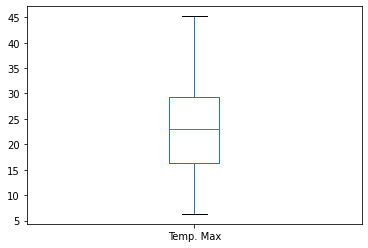

In [ ]:
df2.boxplot(column = 'Temp. Max', grid=False)

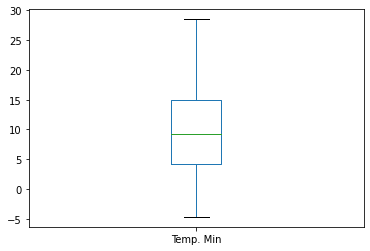

In [ ]:
df2.boxplot(column = 'Temp. Min', grid=False)

##Para los casos en que si hubo lluvia ese dia:

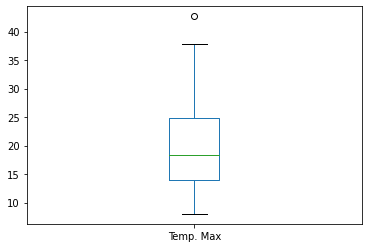

In [ ]:
df2[df2['Lluvia hoy']=='Yes'].boxplot(column = 'Temp. Max', grid=False)

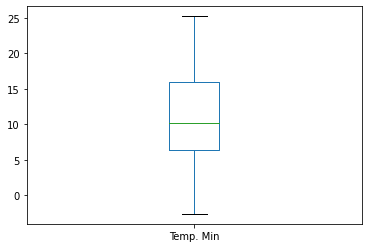

In [ ]:
df2[df2['Lluvia hoy']=='Yes'].boxplot(column = 'Temp. Min', grid=False)

##Analisis Caida de Agua

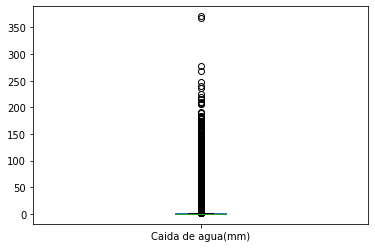

In [ ]:
df.boxplot(column = 'Caida de agua(mm)', grid=False)

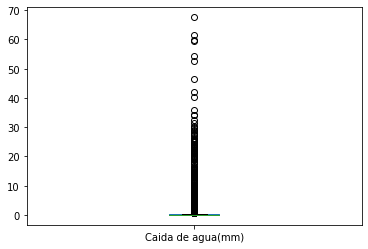

In [ ]:
df2.boxplot(column = 'Caida de agua(mm)', grid=False)

##Analisis Evaporacion

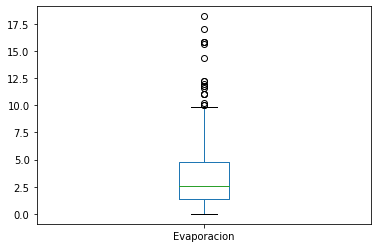

In [ ]:
df2[df2['Lluvia hoy']=='Yes'].boxplot(column = 'Evaporacion', grid=False)

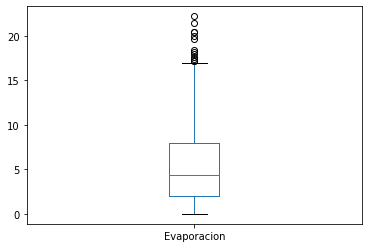

In [ ]:
df2[df2['Lluvia hoy']=='No'].boxplot(column = 'Evaporacion', grid=False)

##Analisis Nubosidad

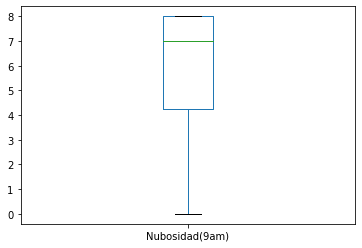

In [ ]:
df2[df2['Lluvia hoy']=='Yes'].boxplot(column = 'Nubosidad(9am)', grid=False)

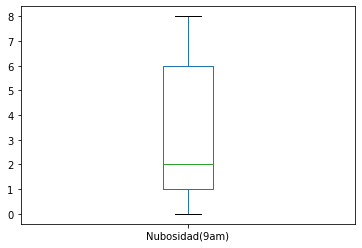

In [ ]:
df2[df2['Lluvia hoy']=='No'].boxplot(column = 'Nubosidad(9am)', grid=False)

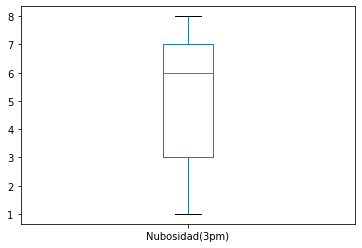

In [ ]:
df2[df2['Lluvia hoy']=='Yes'].boxplot(column = 'Nubosidad(3pm)', grid=False)

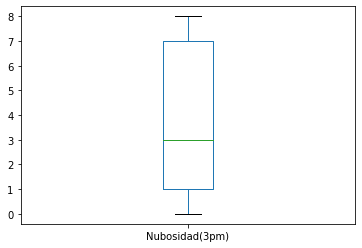

In [ ]:
df2[df2['Lluvia hoy']=='No'].boxplot(column = 'Nubosidad(3pm)', grid=False)

#MC

Limpiamos bien todos los datos

##Temporal (Caso de que se puedan reemplazar valores y no eliminarlos)

In [ ]:
#prom_tmin=df3["Temp. Min"].mean()
#df3["Temp. Min"].replace(np.nan, prom_tmin, inplace=True)

#prom_tmax=df3["Temp. Max"].mean()
#df3["Temp. Max"].replace(np.nan, prom_tmax, inplace=True)

#prom_rap=df3["Rapidez del viento(Mas fuerte)"].mean()
#df3["Rapidez del viento(Mas fuerte)"].replace(np.nan, prom_rap, inplace=True)

#prom_eva=df3["Evaporacion"].mean()
#df3["Evaporacion"].replace(np.nan, prom_eva, inplace=True)

#prom_Hum9=df3["Humedad(9am)"].mean()
#df3["Humedad(9am)"].replace(np.nan, prom_Hum9, inplace=True)

#prom_Hum3=df3["Humedad(3pm)"].mean()
#df3["Humedad(3pm)"].replace(np.nan, prom_Hum3, inplace=True)

#prom_Presion9=df3["Presion(9am)"].mean()
#df3["Presion(9am)"].replace(np.nan, prom_Presion9, inplace=True)

#prom_Presion3=df3["Presion(3pm)"].mean()
#df3["Presion(3pm)"].replace(np.nan, prom_Presion3, inplace=True)

#prom_nub9=df3["Nubosidad(9am)"].mean()
#df3["Nubosidad(9am)"].replace(np.nan, prom_nub9, inplace=True)

#prom_nub3=df3["Nubosidad(3pm)"].mean()
#df3["Nubosidad(3pm)"].replace(np.nan, prom_nub3, inplace=True)

#df3["Caida de agua(mm)"].replace(np.nan, 0, inplace=True)

#df3["Humedad(9am)"].replace(np.nan, 0, inplace=True)

#df3["Lluvia hoy"].replace(np.nan, 0, inplace=True)
#df3["Lluvia mañana"].replace(np.nan, 0, inplace=True)

##Caso Final

In [ ]:
df3 = copy.copy(df2)
df3["Lluvia hoy"].replace('Yes', 1, inplace=True)
df3["Lluvia hoy"].replace('No', 0, inplace=True)
df3["Lluvia mañana"].replace('Yes', 1, inplace=True)
df3["Lluvia mañana"].replace('No', 0, inplace=True)

prom_tmin=df3["Temp. Min"].mean()
df3["Temp. Min"].replace(np.nan, prom_tmin, inplace=True)

prom_tmax=df3["Temp. Max"].mean()
df3["Temp. Max"].replace(np.nan, prom_tmax, inplace=True)

prom_rap=df3["Rapidez del viento(Mas fuerte)"].mean()
df3["Rapidez del viento(Mas fuerte)"].replace(np.nan, prom_rap, inplace=True)

prom_eva=df3["Evaporacion"].mean()
df3["Evaporacion"].replace(np.nan, prom_eva, inplace=True)

prom_Hum9=df3["Humedad(9am)"].mean()
df3["Humedad(9am)"].replace(np.nan, prom_Hum9, inplace=True)

prom_Hum3=df3["Humedad(3pm)"].mean()
df3["Humedad(3pm)"].replace(np.nan, prom_Hum3, inplace=True)

prom_Presion9=df3["Presion(9am)"].mean()
df3["Presion(9am)"].replace(np.nan, prom_Presion9, inplace=True)

prom_Presion3=df3["Presion(3pm)"].mean()
df3["Presion(3pm)"].replace(np.nan, prom_Presion3, inplace=True)

prom_nub9=df3["Nubosidad(9am)"].mean()
df3["Nubosidad(9am)"].replace(np.nan, prom_nub9, inplace=True)

prom_nub3=df3["Nubosidad(3pm)"].mean()
df3["Nubosidad(3pm)"].replace(np.nan, prom_nub3, inplace=True)

df3["Caida de agua(mm)"].replace(np.nan, 0, inplace=True)

df3["Humedad(9am)"].replace(np.nan, 0, inplace=True)

df3["Lluvia hoy"].replace(np.nan, 0, inplace=True)
df3["Lluvia mañana"].replace(np.nan, 0, inplace=True)

df4 = df3.drop(['Brillo Solar','Dir. del viento(Mas fuerte)','Rapidez del viento(Mas fuerte)','Dir. del viento(9am)','Dir. del viento(3pm)','Rapidez del viento(9am)','Rapidez del viento(3pm)','Temperatura(9am)','Temperatura(3pm)'],axis=1)

#df4.dropna(subset = ["Evaporacion"], axis = 0, inplace = True)

#df4.dropna(subset = ["Nubosidad(9am)"], axis = 0, inplace = True)

#df4.dropna(subset = ["Nubosidad(3pm)"], axis = 0, inplace = True)

#df4.dropna(subset = ["Lluvia hoy"], axis = 0, inplace = True)

#df4.dropna(subset = ["Lluvia mañana"], axis = 0, inplace = True)

df4

,Fecha,Ubicacion,Temp. Min,Temp. Max,Caida de agua(mm),Evaporacion,Humedad(9am),Humedad(3pm),Presion(9am),Presion(3pm),Nubosidad(9am),Nubosidad(3pm),Lluvia hoy,Lluvia mañana
36529,2009-01-01,WaggaWagga,9.9,28.4,0.0,9.8,37.0,24.0,1005.2,1003.5,1.0,1.0,0,0
36530,2009-01-02,WaggaWagga,8.9,25.3,0.0,14.8,37.0,10.0,1013.9,1012.9,1.0,0.0,0,0
36531,2009-01-03,WaggaWagga,11.0,30.7,0.0,9.8,43.0,18.0,1017.8,1014.3,0.0,1.0,0,0
36532,2009-01-04,WaggaWagga,14.7,35.2,0.0,9.4,46.0,19.0,1014.8,1010.6,1.0,4.0,0,0
36533,2009-01-05,WaggaWagga,11.8,36.5,0.0,11.6,23.0,5.0,1013.1,1009.8,1.0,1.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39108,2016-04-22,WaggaWagga,14.7,24.2,1.4,2.8,85.0,52.0,1021.7,1018.9,1.0,3.0,1,0
39109,2016-04-23,WaggaWagga,9.6,23.5,0.0,3.4,56.0,24.0,1026.2,1024.2,1.0,1.0,0,0
39110,2016-04-24,WaggaWagga,7.5,24.1,0.0,3.6,48.0,25.0,1030.6,1027.6,0.0,1.0,0,0
39111,2016-04-25,WaggaWagga,8.0,24.2,0.0,3.8,63.0,32.0,1032.0,1027.8,0.0,1.0,0,0


In [ ]:
df4.head()

,Fecha,Ubicacion,Temp. Min,Temp. Max,Caida de agua(mm),Evaporacion,Humedad(9am),Humedad(3pm),Presion(9am),Presion(3pm),Nubosidad(9am),Nubosidad(3pm),Lluvia hoy,Lluvia mañana
36529,2009-01-01,WaggaWagga,9.9,28.4,0.0,9.8,37.0,24.0,1005.2,1003.5,1.0,1.0,0,0
36530,2009-01-02,WaggaWagga,8.9,25.3,0.0,14.8,37.0,10.0,1013.9,1012.9,1.0,0.0,0,0
36531,2009-01-03,WaggaWagga,11.0,30.7,0.0,9.8,43.0,18.0,1017.8,1014.3,0.0,1.0,0,0
36532,2009-01-04,WaggaWagga,14.7,35.2,0.0,9.4,46.0,19.0,1014.8,1010.6,1.0,4.0,0,0
36533,2009-01-05,WaggaWagga,11.8,36.5,0.0,11.6,23.0,5.0,1013.1,1009.8,1.0,1.0,0,0


In [ ]:
columnas = list(df4)
for columna in columnas:
    print("Cantidad de datos sin " + columna + ": " + str(len(df4) - df4[columna].count()))
    print(str(np.round((len(df4) - df4[columna].count())/float(len(df4))*100,2))+"%")
    print("-------")

Cantidad de datos sin Fecha: 0
0.0%
-------
Cantidad de datos sin Ubicacion: 0
0.0%
-------
Cantidad de datos sin Temp. Min: 0
0.0%
-------
Cantidad de datos sin Temp. Max: 0
0.0%
-------
Cantidad de datos sin Caida de agua(mm): 0
0.0%
-------
Cantidad de datos sin Evaporacion: 0
0.0%
-------
Cantidad de datos sin Humedad(9am): 0
0.0%
-------
Cantidad de datos sin Humedad(3pm): 0
0.0%
-------
Cantidad de datos sin Presion(9am): 0
0.0%
-------
Cantidad de datos sin Presion(3pm): 0
0.0%
-------
Cantidad de datos sin Nubosidad(9am): 0
0.0%
-------
Cantidad de datos sin Nubosidad(3pm): 0
0.0%
-------
Cantidad de datos sin Lluvia hoy: 0
0.0%
-------
Cantidad de datos sin Lluvia mañana: 0
0.0%
-------


##Modelos

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.simplefilter('ignore')

In [ ]:
list(df4.columns)

['Fecha',
 'Ubicacion',
 'Temp. Min',
 'Temp. Max',
 'Caida de agua(mm)',
 'Evaporacion',
 'Humedad(9am)',
 'Humedad(3pm)',
 'Presion(9am)',
 'Presion(3pm)',
 'Nubosidad(9am)',
 'Nubosidad(3pm)',
 'Lluvia hoy',
 'Lluvia mañana']

In [ ]:
caracteristicas=['Temp. Min','Temp. Max','Caida de agua(mm)','Evaporacion','Humedad(9am)','Humedad(3pm)','Presion(9am)','Presion(3pm)','Nubosidad(9am)','Nubosidad(3pm)']

In [ ]:
X = df4.loc[:,caracteristicas].to_numpy()
etiqueta = ['Lluvia mañana']
y = df4.loc[:,etiqueta].to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
ad = DecisionTreeClassifier(max_depth = 6) # Creando el modelo
ad.fit(X_train, y_train)
Y_pred = ad.predict(X_test)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, Y_pred).ravel()

print('tn: ' + str(tn))
print('fp: ' + str(fp))
print('fn: ' + str(fn))
print('tp: ' + str(tp))

correctitud = (tp+tn)/float(tp+fp+fn+tn)
sensibilidad = (tp)/float(tp+fn)
especificidad = (tn)/float(fp+tn)
precision = (tp)/float(tp+fp)
tasa_real = (tp+fn)/float(tp+fp+fn+tn)
Puntaje_F1 = 2*(precision*sensibilidad)/float(precision+sensibilidad)

print('--------')

print("correctitud: " + str(np.round(correctitud*100,2)) + "%")
print("sensibilidad: " + str(np.round(sensibilidad*100,2)) + "%")
print("especificidad: " + str(np.round(especificidad*100,2)) + "%")
print("precision: " + str(np.round(precision*100,2)) + "%")
print("tasa_real: " + str(np.round(tasa_real*100,2)) + "%")
print("f1_score: " + str(np.round(Puntaje_F1*100,2)) + "%")

tn: 518
fp: 15
fn: 65
tp: 45
--------
correctitud: 87.56%
sensibilidad: 40.91%
especificidad: 97.19%
precision: 75.0%
tasa_real: 17.11%
f1_score: 52.94%


Validacion cruzada

In [ ]:
cross_val_score(ad, X, y, cv=10, scoring='roc_auc')

array([0.82994262, 0.84080239, 0.79497439, 0.79492104, 0.78462441,
       0.8943662 , 0.76520487, 0.86598378, 0.82522407, 0.7836478 ])

##Usando otros modelos

In [ ]:
ad_cv = cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='roc_auc')
rf_cv = cross_val_score(RandomForestRegressor(), X, y, cv=10, scoring='roc_auc')
ab_cv = cross_val_score(AdaBoostClassifier(), X, y, cv=10, scoring='roc_auc')
gb_cv = cross_val_score(GradientBoostingClassifier(), X, y, cv=10, scoring='roc_auc')
ld_cv = cross_val_score(LinearDiscriminantAnalysis(), X, y, cv=10, scoring='roc_auc')
gn_cv = cross_val_score(GaussianNB(), X, y, cv=10, scoring='roc_auc')
lr_cv = cross_val_score(LogisticRegression(), X, y, cv=10, scoring='roc_auc')
knn_cv = cross_val_score(KNeighborsClassifier(), X, y, cv=10, scoring='roc_auc')
svc_cv = cross_val_score(SVC(), X, y, cv=10, scoring='roc_auc')
mlp_cv = cross_val_score(MLPClassifier(), X, y, cv=10, scoring='roc_auc')

In [ ]:
print("AD: " + str(np.round(np.mean(ad_cv)*100,2)))
print("RF: " + str(np.round(np.mean(rf_cv)*100,2)))
print("AB: " + str(np.round(np.mean(ab_cv)*100,2)))
print("GB: " + str(np.round(np.mean(gb_cv)*100,2)))
print("LD: " + str(np.round(np.mean(ld_cv)*100,2)))
print("GN: " + str(np.round(np.mean(gn_cv)*100,2)))
print("LR: " + str(np.round(np.mean(lr_cv)*100,2)))
print("KNN: " + str(np.round(np.mean(knn_cv)*100,2)))
print("SVC: " + str(np.round(np.mean(svc_cv)*100,2)))
print("MLP: " + str(np.round(np.mean(mlp_cv)*100,2)))

AD: 71.0
RF: 88.15
AB: 88.67
GB: 89.45
LD: 90.67
GN: 85.98
LR: 89.31
KNN: 80.36
SVC: 87.14
MLP: 86.47


In [ ]:
#Probamos con los 4 mejores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Logistic Regression
modelo1 = LogisticRegression()
modelo1.fit(X_train, y_train)
modelo1_y_pred = modelo1.predict(X_test)
#print(modelo1_y_pred)

# LDA
modelo2 = LinearDiscriminantAnalysis()
modelo2.fit(X_train, y_train)
modelo2_y_pred = modelo2.predict(X_test)
#print(modelo2_y_pred)

# AdaBoost
modelo3 = AdaBoostClassifier()
modelo3.fit(X_train, y_train)
modelo3_y_pred = modelo3.predict(X_test)
#print(modelo3_y_pred)

# Gradient Boosting
modelo4 = GradientBoostingClassifier()
modelo4.fit(X_train, y_train)
modelo4_y_pred = modelo4.predict(X_test)
#print(modelo4_y_pred)

In [ ]:
preds = [np.mean([p1, p2, p3, p4]) for (p1, p2, p3, p4) in zip(modelo1_y_pred, modelo2_y_pred, modelo3_y_pred, modelo4_y_pred)]
preds_ensamble = [1 if prob >= 0.5 else 0 for prob in preds]

In [ ]:
print("Logistic Regression:")
print(f"  Correctitud  : {round(accuracy_score(y_test, modelo1_y_pred), 2)}")
print(f"  Presicion : {round(precision_score(y_test, modelo1_y_pred), 2)}")
print(f"  Sensibilidad    : {round(recall_score(y_test, modelo1_y_pred), 2)}")
print(f"  F1 Score        : {round(f1_score(y_test, modelo1_y_pred), 2)}")
print(f"  Tasa real   : {round(roc_auc_score(y_test, modelo1_y_pred), 2)}")

print("LDA:")
print(f"  Correctitud  : {round(accuracy_score(y_test, modelo2_y_pred), 2)}")
print(f"  Presicion : {round(precision_score(y_test, modelo2_y_pred), 2)}")
print(f"  Sensibilidad    : {round(recall_score(y_test, modelo2_y_pred), 2)}")
print(f"  F1 Score        : {round(f1_score(y_test, modelo2_y_pred), 2)}")
print(f"  Tasa real   : {round(roc_auc_score(y_test, modelo2_y_pred), 2)}")

print("AdaBoost:")
print(f"  Correctitud  : {round(accuracy_score(y_test, modelo3_y_pred), 2)}")
print(f"  Presicion : {round(precision_score(y_test, modelo3_y_pred), 2)}")
print(f"  Sensibilidad    : {round(recall_score(y_test, modelo3_y_pred), 2)}")
print(f"  F1 Score        : {round(f1_score(y_test, modelo3_y_pred), 2)}")
print(f"  Tasa real   : {round(roc_auc_score(y_test, modelo3_y_pred), 2)}")

print("Gradient Boosting:")
print(f"  Correctitud  : {round(accuracy_score(y_test, modelo4_y_pred), 2)}")
print(f"  Presicion : {round(precision_score(y_test, modelo4_y_pred), 2)}")
print(f"  Sensibilidad    : {round(recall_score(y_test, modelo4_y_pred), 2)}")
print(f"  F1 Score        : {round(f1_score(y_test, modelo4_y_pred), 2)}")
print(f"  Tasa real   : {round(roc_auc_score(y_test, modelo4_y_pred), 2)}")

print("-----------------------------")

print("Modelo Ensamble:")
print(f"  Correctitud  : {round(accuracy_score(y_test, preds_ensamble), 2)}")
print(f"  Presicion : {round(precision_score(y_test, preds_ensamble), 2)}")
print(f"  Sensibilidad    : {round(recall_score(y_test, preds_ensamble), 2)}")
print(f"  F1 Score        : {round(f1_score(y_test, preds_ensamble), 2)}")
print(f"  Tasa real   : {round(roc_auc_score(y_test, preds_ensamble), 2)}")

Logistic Regression:
  Correctitud  : 0.89
  Presicion : 0.81
  Sensibilidad    : 0.53
  F1 Score        : 0.64
  Tasa real   : 0.75
LDA:
  Correctitud  : 0.89
  Presicion : 0.79
  Sensibilidad    : 0.55
  F1 Score        : 0.65
  Tasa real   : 0.76
AdaBoost:
  Correctitud  : 0.88
  Presicion : 0.7
  Sensibilidad    : 0.59
  F1 Score        : 0.64
  Tasa real   : 0.77
Gradient Boosting:
  Correctitud  : 0.89
  Presicion : 0.74
  Sensibilidad    : 0.58
  F1 Score        : 0.65
  Tasa real   : 0.77
-----------------------------
Modelo Ensamble:
  Correctitud  : 0.89
  Presicion : 0.74
  Sensibilidad    : 0.58
  F1 Score        : 0.65
  Tasa real   : 0.77


Feature: Temp. Min, Score: 5.38
Feature: Temp. Max, Score: 3.62
Feature: Caida de agua(mm), Score: 1.83
Feature: Evaporacion, Score: 2.86
Feature: Humedad(9am), Score: 4.25
Feature: Humedad(3pm), Score: 48.14
Feature: Presion(9am), Score: 5.07
Feature: Presion(3pm), Score: 18.10
Feature: Nubosidad(9am), Score: 3.11
Feature: Nubosidad(3pm), Score: 7.64


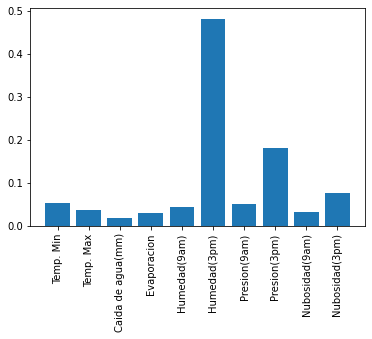

In [ ]:
model = GradientBoostingClassifier()
model.fit(X, y)
importance = model.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0s, Score: %.2f' % (caracteristicas[i],v*100))

y_pos = range(len(caracteristicas))
pyplot.bar(y_pos, importance)
pyplot.xticks(y_pos, caracteristicas, rotation=90)
pyplot.show()